In [1]:
# cd .\Chapter07
# jupyter nbconvert .\Main.ipynb --to slides --execute 
# python -m jupyterlab_rise .\Main.ipynb

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

# Chapter 7 - Moving Beyond Linearity

## Relaxing Assumption Of Linearity

<ul>
<li class="fragment">Recall previous notation, we have $p$ predictors $X=\left(X_{1}, X_{2}, \dots, X_{p}\right)\in\mathbb{R}^{n\times p}$ and a response $y\in\mathbb{R}^{n}$</li>
<li class="fragment">We assume that there is some relationship between $X$ and $y$ that we can represent as: $$y = f\left(X\right) + \epsilon$$</li>
<ul>

<ul>
<li>Additionally, recall that we do not know the true $f$ and therefore are trying to estimate it</li>
<li class="fragment">Our estimate is denoted by $\hat{f}$. The value for the response produced by this estimated function is $\hat{y}$</li>
<li class="fragment">So far we have restricted the form of $\hat{f}$ to be linear:

$$\hat{y} = X\beta $$</li>

<li class="fragment">We now relax this assumption and build on the linear models to maintain interpretibility</li>
</ul>

## Different methods

The following methods build on the linear regression methods 

<ol>
<li class="fragment">Polynomial regression - adding extra predictors of the form $X^{d}$ (tend to use  $d < 4$ otherwise unusual/unlikely shapes) </li>
<li class="fragment">Step functions - fitting a piecewise constant function, for $K$ distinct regions. Effectively creating a qualitative variable. </li>
<li class="fragment">Regression Splines - extension of 1 and 2. Split into $K$ regions and fit a polynomial. Constrained to join smoothly at the boundaries </li>
<li class="fragment">Smoothing Splines - similar to regression spline, but motivated differently. Arise from minimizing residual sum of squares subject to smoothness penalty </li>
<li class="fragment">Local regression - similar to splines but regions are allowed to overlap.  </li>
<li class="fragment">Generalized Additive Models - generalizes the above methods to deal with multiple predictors </li>
</ol>

## Polynomial Regression

<span class="fragment">$$ \hat{f}\left(x_0\right) = \sum_{j=0}^D \beta_jx_0^j $$</span>

<ul>
<li class="fragment">Rule of thumb - $D < 4$ to avoid overfitting and strange shapes especially at the boundaries of $x$</li>
<li class="fragment">We will only be working with one feature and taking the polynomial expansion of that</li>
<li class="fragment">We can fit this using normal linear regression with features $X_1 = X, X_2 = X^2, \dots, X_D = X^D$</li>
</ul>

### Example Standard Error (Logistic Regression)

![](images/polynomial_standard_error.png)

### Equations

Suppose $y$ is wage and $x$ is age

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2x_i^2 + \beta_3x_i^3 + \beta_4 x_i^4 + \epsilon_i
$$

$$ 
\mathbb{P}\left[y_i > 250 \middle| x_i\right] = \frac{\exp\left(\beta_0 + \beta_1 x_i + \beta_2x_i^2 + \beta_3x_i^3 + \beta_4 x_i^4\right)}{1 + \exp\left(\beta_0 + \beta_1 x_i + \beta_2x_i^2 + \beta_3x_i^3 + \beta_4 x_i^4\right)}
$$



### Side Track

- We can estimate the standard error of $\hat{f}\left(x_0\right)$ to be the squareroot of the variance of $\hat{f}\left(x_0\right)$
- Where $\mathbb{V}\left[\hat{f}\left(x_0\right)\right] = l_0'\mathbb{V}\left[\hat{\beta}\right]l_0$ where $l_0' = \left(1,x_0,x_0^2,...,x_0^d\right)$
- The standard error explodes because the size of $x_0^d$ will increase exponentially as $x_0$ increases

## Step Functions

<ul>
<li class="fragment">We partition our feature space and fit a constant for each partition</li>
<li class="fragment">Doing this will result in the fitted function to be a step function</li>
</ul>

- Let us start with the following single variable dataset:
| $y$ | $X$ |
| -- | -- |
| $y_1$ | $x_1$ |
| $y_2$ | $x_2$ |
| $y_3$ | $x_3$ |
| $y_4$ | $x_4$ |
| $y_5$ | $x_5$ |
| $y_6$ | $x_6$ |

- Suppose we create the partition with ($x_1, x_2$), ($x_3, x_4$) and ($x_5, x_6$), ignoring the constant term we have:

| $y$ | $\tilde{X}_1$ | $\tilde{X}_2$ | $\tilde{X}_3$ |
| -- | -- | -- | -- |
| $y_1$ | 1 | 0 | 0 |
| $y_2$ | 1 | 0 | 0 |
| $y_3$ | 0 | 1 | 0 |
| $y_4$ | 0 | 1 | 0 |
| $y_5$ | 0 | 0 | 1 |
| $y_6$ | 0 | 0 | 1 |

### Example Standard Error

![](images/step_standard_error.png)

### Equations

Suppose $y$ is wage and $x$ is age

$$
y_i = \beta_0 + \beta_1 \tilde{x}_1 + \beta_2 \tilde{x}_2 + \beta_3 \tilde{x}_3 + \epsilon_i
$$

$$ 
\mathbb{P}\left[y_i > 250 \middle| x_i\right] = \frac{\exp\left(\beta_0 + \beta_1 \tilde{x}_1 + \beta_2 \tilde{x}_2 + \beta_3 \tilde{x}_3\right)}{1 + \exp\left(\beta_0 + \beta_1 \tilde{x}_1 + \beta_2 \tilde{x}_2 + \beta_3 \tilde{x}_3\right)}
$$



### Note

- If there are no natural break points, you can miss key changes in the data
- Choosing the break points can be problematic
- We call the break points cut points or knots

## Piecewise Polynomials

<ul>
<li class="fragment">This is combining the two previous concepts where we will use a polynomial expansion on our feature but then fit separate models for each partition</li>
<li class="fragment">Example:

$$
y_i = 
\begin{cases}
\beta_{01} + \beta_{11}x_i + \beta_{21}x_i^2 + \beta_{31}x_i^3 + \epsilon_i & \text{if } x_i < c\\
\beta_{02} + \beta_{12}x_i + \beta_{22}x_i^2 + \beta_{32}x_i^3 + \epsilon_i & \text{if } x_i \geq c\\
\end{cases}
$$</li>
</ul>

## Basis Functions

<ul>
<li class="fragment">Polynomial and step functions are special cases of basis function approach, all of these benefit from using the tools of regression</li>
<li class="fragment">Suppose we have functions $b_1\left(X\right), \dots, b_k\left(X\right)$ which are fixed and known ahead of time which form the new set of features</li>
<li class="fragment">Basis functions should be the smallest set of functions which spans the space of $f$, generally this would be an infinitely dimensional space but we will take a truncated basis</li>
<li class="fragment">Examples are wavelets and Fourier series as well regression splines (next section)</li>
</ul>

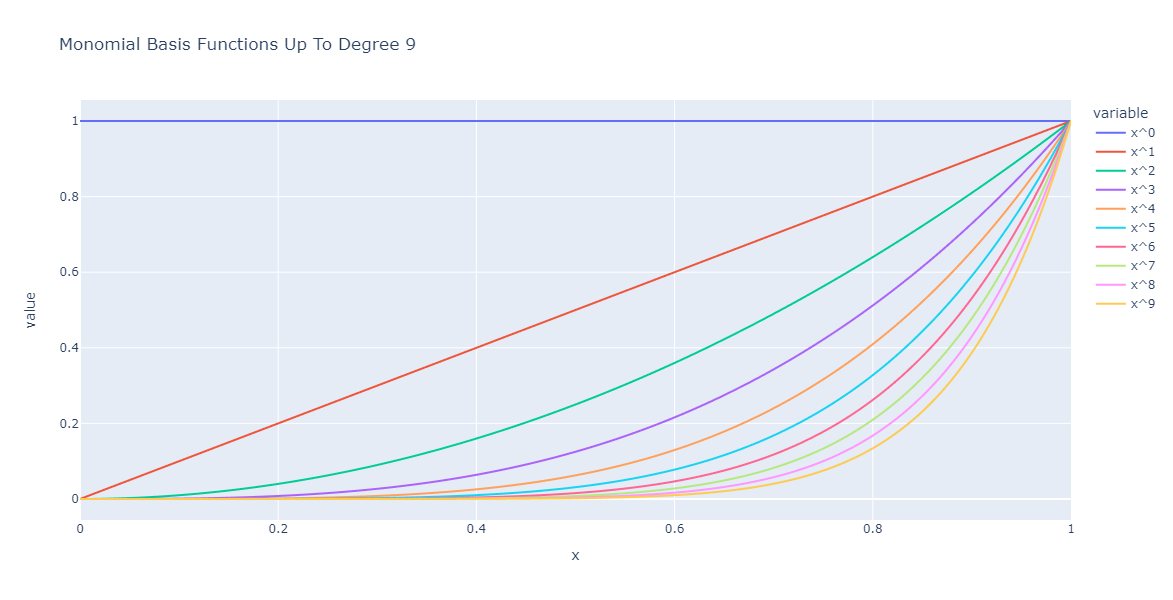

In [53]:
x = np.linspace(0, 1, 1_000)
D = 10
(
    pd.DataFrame({
        "x": x,
        **{f"x^{d}": np.power(x, d) for d in range(D)},
    })
    .pipe(px.line, x="x", y=[f"x^{d}" for d in range(D)], height=600, title=f"Monomial Basis Functions Up To Degree {D - 1}")
)

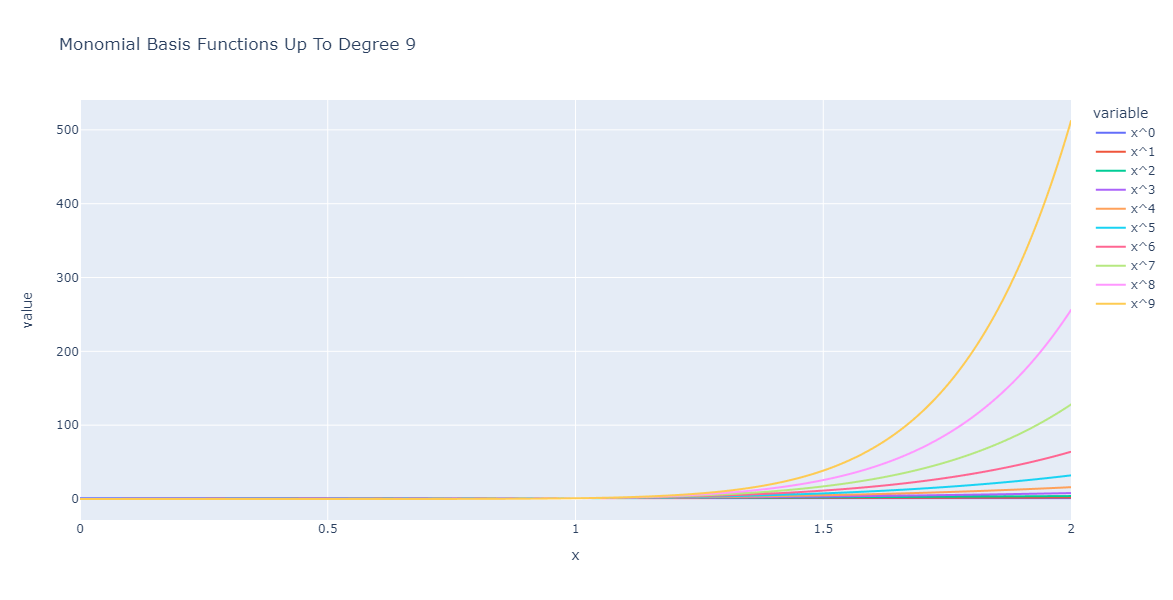

In [34]:
x = np.linspace(0, 2, 1_000)
D = 10
(
    pd.DataFrame({
        "x": x,
        **{f"x^{d}": np.power(x, d) for d in range(D)},
    })
    .pipe(px.line, x="x", y=[f"x^{d}" for d in range(D)], height=600, title=f"Monomial Basis Functions Up To Degree {D - 1}")
)

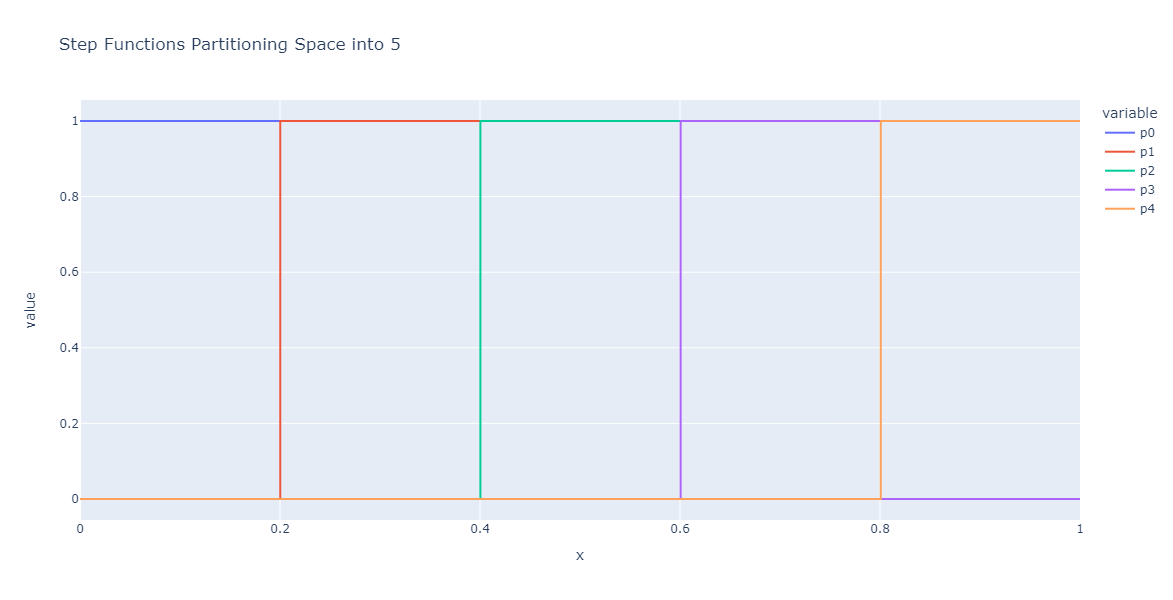

In [55]:
x = np.linspace(0, 1, 1_000)
partitions = 5
(
    pd.DataFrame({
        "x": x,
        **{f"p{i}": np.where((i / partitions <= x) & (x <= (i + 1) / partitions), 1, 0) for i in range(partitions)},
    })
    .pipe(px.line, x="x", y=[f"p{i}" for i in range(partitions)], height=600, title=f"Step Functions Partitioning Space into {partitions}", line_shape="hv")
)

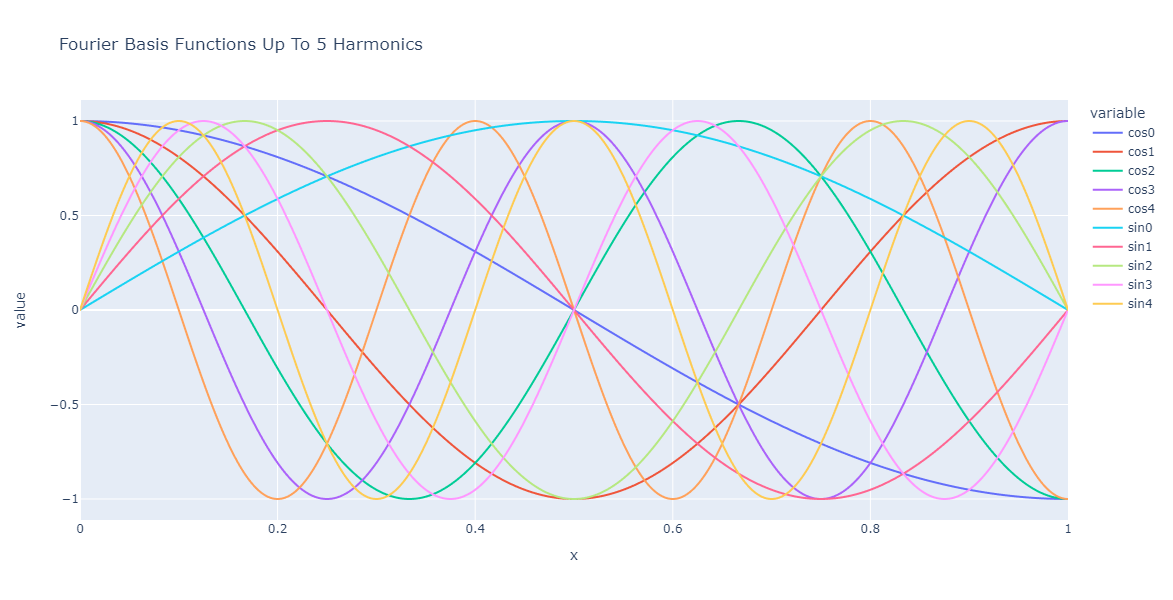

In [50]:
x = np.linspace(0, 1, 1_000)
harmonics = 5
(
    pd.DataFrame({
        "x": x,
        **{f"cos{i}": np.cos(np.pi * (i + 1) * x) for i in range(harmonics)},
        **{f"sin{i}": np.sin(np.pi * (i + 1)  * x) for i in range(harmonics)},
    })
    .pipe(px.line, x="x", y=[f"cos{i}" for i in range(harmonics)] + [f"sin{i}" for i in range(harmonics)], height=600, title=f"Fourier Basis Functions Up To {harmonics} Harmonics")
)

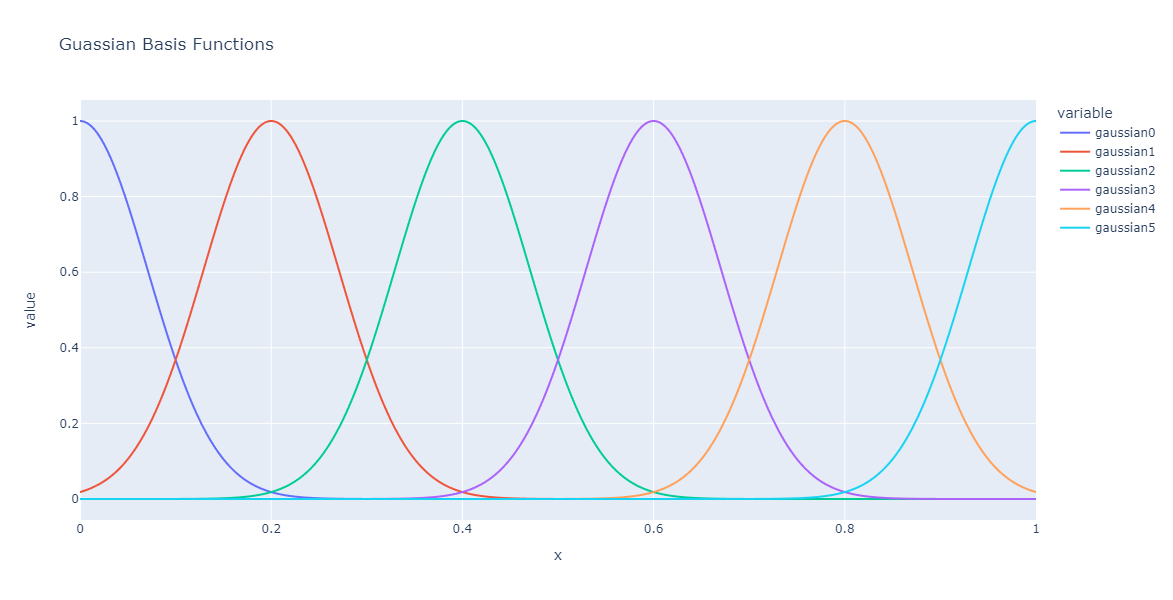

In [63]:
 x   = np.linspace(0, 1, 1_000)
num_peaks = 5
(
    pd.DataFrame({
        "x": x,
        # Source - https://courses.cs.washington.edu/courses/cse446/20wi/Lecture7/07_BasisFunctions.pdf
        **{f"gaussian{i}": np.exp(-np.power(x - i / num_peaks, 2) / (2 * 0.05) ** 2) for i in range(num_peaks + 1)},
    })
    .pipe(px.line, x="x", y=[f"gaussian{i}" for i in range(num_peaks + 1)], height=600, title=f"Guassian Basis Functions")
)

## Piecewise Verses Spline

![](images/piecewise_vs_spline.png)

## Regression Splines

<ul>
<li class="fragment">Degree $D$ spline is a piecewise polynomial with degree $D$ with continuity in derivatives up to degree $D-1$</li>
<li class="fragment">We can represent the cubic spline using truncated power basis functions defined as:

$$\begin{align}
    f\left(x\right) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \sum_{k=1}^K\beta_{k+3} \left(x-\xi_k\right)^3_+
\end{align}$$</li>

<li class="fragment"> Where $\xi_k$ denotes the knots for $k=1,\dots, K$ and

$$
\left(x-\xi_k\right)^3_+ = 
\begin{cases}
\left(x-\xi_k\right)^3 & \text{if } x>\xi_k\\
0 & \text{otherwise}\\
\end{cases}
$$</li>

<li class="fragment">Exercise 1 in conceptual exercises shows that with one knot, the truncated power basis functions represent cubic spline</li>
<li class="fragment">With the truncated power basis function representation, it is easy to see how to fit linear regression with it</li>
<li class="fragment"> This generalizes to order $D$ splines</li>
</ul>

### Degrees of Freedom

<ul>
<li class="fragment">For a general linear regression the number of degrees of freedom is $p$ where $p$ is number of features (including the intercept)</li>
<li class="fragment">For a cubic spline, we have the features $x^0, x^1, x^2, x^3$ and $\left(x-\xi_k\right)^3$ where $k=1,\dots,K$ hence the number of degrees of freedom is $K+4$</li>
<li class="fragment">For piecewise polynomial regression with $K$ knots, we have to fit $K+1$ different models with degree $D$ polynomials, giving us $\left(D + 1\right)\times\left(K+1\right)$ features and therefore number of degrees of freedom. Too flexible!</li>
<li class="fragment">Each constraint we add gives one less degree of freedom, therefore for the cubic case, we add three constraints - continuity, first derivative continuity and second derivative continuity</li>
<li class="fragment">For one knot, top left chart we start with $8 = 4 \times 2$ degrees of freedom for piecewise cubic, and by adding the constraints for the spline, we end up with $ 8 - 3 = 5$ degrees of freedom bottom left</li>
</ul>

### Natural Cubic Spline

- Extrapolate linearly beyond the boundary knot, adding 4 (2 edge partitions and 2 fewer degrees of polynomials i.e. no quadratic and cubic) extra constraints

![](images/natural_cubic_spline.png)

### Choosing Knots
<ul>
<li class="fragment">Place more knots where the functions varies more rapidly (maybe use rolling standard deviation to define this)</li>
<li class="fragment">Place knots in uniformly, e.g. quantiles of the data</li>
<li class="fragment">Cross validation for the number of knots</li>
</ul>

## Smoothing Splines

<ul>
<li class="fragment">We start with the following loss function:
$$\text{RSS} = \sum_{i=1}^n\left(y_i - g\left(x_i\right)\right)^2$$</li>
<li class="fragment">If $g\left(x\right)$ is unconstrained then $\text{RSS}$ can be made to be zero but we overfit. The function in this case is unlikely to be smooth</li>
<li class="fragment">Therefore, we could minimize $\text{RSS}$ subject to the constraint that $g$ is smooth</li>
<li class="fragment">The loss function for smoothing splines is given by:

$$\sum_{i=1}^n\left(y_i - g\left(x_i\right)\right)^2 + \lambda \int g''\left(t\right)^2dt$$</li>

<li class="fragment">$\lambda$ is the smoothing penalty, as $\lambda$ increases, $g$ will be smoother, it controls the bias variance tradeoff</li>
<li class="fragment">$g''$ is approximately the roughness of the function, $g''$ is zero for a straight line, i.e. as smooth as it gets</li>
<li class="fragment">$\int g''\left(t\right)^2dt$ is measuring the total change in $g'$ over the range</li>
</ul>

### Smoothing Spline Solution

<ul>
<li class="fragment">$g\left(x\right)$ which minimizes the smooth penalty loss function has the following properties:</li>
    <ol>
      <li class="fragment">It is a piecewise cubic polynomial with knots at unique values of $x_1,\dots,x_n$</li>
      <li class="fragment">It is continuous at the first and second derivatives at the knots</li>
      <li class="fragment">It is linear outside of the boundary knots</li>
    </ol>
<li class="fragment">Therefore, it is a natural cubic with knots at $x_1,\dots,x_n$</li>
<li class="fragment">It is not the same natural cubic spline that comes from the basis function approach, it is a shrunken version where $\lambda$ controls the level of shrinkage</li>
</ul>

### Choosing $\lambda$

<ul>
<li class="fragment">$\lambda$ controls the smoothness and hence the degrees of freedom</li>
<li class="fragment">As $\lambda$ increases from zero to infinity, the effective degrees, $df_\lambda$, of freedom decrease from $n$ to 2</li>
<li class="fragment">Use cross validation to choose $\lambda$, can use leave one out which efficient for smoothing splines</li>
<li class="fragment">You could choose degrees of freedom rather than $\lambda$</li>
</ul>

## Local Regression

<ul>
<li class="fragment">$s$ is denoted as span which is the proportion of points used to compute the local regression. It controls the flexibility of the regression</li>
<li class="fragment">Algorithm for $X=x_0$
    <ol>
  <li class="fragment">Take $s=k/n$ data points closest to $x_0$</li>
  <li class="fragment">Assign a weight $K_{i,0} = K\left(x_i,x_0\right)$ to each point in the neighborhood where the furthest point 0 and the closest has the highest weight</li>
  <li class="fragment">Fit a weighted least squares regression of $y_i$ on $x_i$ finding $\beta$ that minimizes:
    $$\begin{align}\sum_{i=1}^n K_{i,0}\left(y_i - \beta_0 - \beta_1x_i\right)^2\end{align}$$</li>
  <li class="fragment">The fitted value at $x_0$ is given by $\hat{f}\left(x_0\right) = \hat{\beta}_0 + \hat{\beta}_1 x_0$</li>
    </ol>
</li>
<li class="fragment">Variants:
<ul>
  <li class="fragment">Different weighting functions</li>
  <li class="fragment">You could do a polynomial expansion on the feature</li>
</ul>
</li>
</ul>

![](images/local_regression.png)

## Generalized Additive Models

<ul>
<li class="fragment">Extend multiple linear regression by allowing non linear functions</li>
<li class="fragment">We replace the standard linear equation with smooth non linear functions in the following way:

$$\begin{align}y_i = \beta_0 + \sum_{j=1}^p f_j\left(x_{ij}\right) + \epsilon_i\end{align}$$</li>

<li class="fragment">It is called an additive model we calculate a separate $f_j$ for each $X_j$ and then add together all their contributions</li>
<li class="fragment">We can easily do a spline via this method but not smoothing splines</li>
<li class="fragment">Use back fitting to fit GAMs using smoothing splines</li>
</ul>

## Summary of Methods

| Method | Advantages | Disadvantages |
| -- | -- | -- |
| Polynomial regression | Simple way to provide non linearity | Notorious tail behaviour, bad for extrapolation - limit to degree less than 4 |
| Step function | Simple and popular in biostatistics and epidemiology | Miss relationships at the break points, choosing the breakpoints can be difficult |
| Piecewise polynomial | | Discontinuities at break points. High degrees of freedom |
| Spline | No need to go beyond degree 3 as the discontinuity is not visible to human eye. Introduce flexibility without adding too many degrees of freedom (leads to more stable estimates compared to piecewise polynomial) | High variance on outer range (improved by natural spline) |
| Smoothing Spline | It is a natural cubic spline. Do not need to specify knots. Can specify $\lambda$ through degrees of freedom. | More complicated method to calculate |
| Local regression | Allows to fit a model for global in some variables and local in others | Need all training data for prediction. Performs poorly for $p>3$ due to curse of dimensions |
| Generalized additive model | We can see the contribution of each $X_j$ onto $y$. More accurate predictions compared to linear. | Main limitation is that it has to be additive |